In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 기온 데이터 읽어 들이기
df = pd.read_csv('tem10y.csv', encoding="utf-8")

In [5]:
# 데이터를 학습 전용과 테스트 전용으로 분리하기 ---(*1)
train_year = (df["연"] <= 2015)
test_year = (df["연"] >= 2016)
interval = 3

In [6]:
# 과거 6일의 데이터를 기반으로 학습할 데이터 만들기 ---(*2)
def make_data(data):
    x = [] # 학습 데이터
    y = [] # 결과
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)


In [11]:
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

In [14]:
df[train_year][:10], train_x[:10], train_y[:10]

(      연  월   일   기온  품질  균질
 0  2006  1   1  3.6   8   1
 1  2006  1   2  4.0   8   1
 2  2006  1   3  3.7   8   1
 3  2006  1   4  4.0   8   1
 4  2006  1   5  3.6   8   1
 5  2006  1   6  2.1   8   1
 6  2006  1   7  2.8   8   1
 7  2006  1   8  4.2   8   1
 8  2006  1   9  3.7   8   1
 9  2006  1  10  4.3   8   1,
 [[3.6, 4.0, 3.7],
  [4.0, 3.7, 4.0],
  [3.7, 4.0, 3.6],
  [4.0, 3.6, 2.1],
  [3.6, 2.1, 2.8],
  [2.1, 2.8, 4.2],
  [2.8, 4.2, 3.7],
  [4.2, 3.7, 4.3],
  [3.7, 4.3, 6.1],
  [4.3, 6.1, 6.1]],
 [4.0, 3.6, 2.1, 2.8, 4.2, 3.7, 4.3, 6.1, 6.1, 4.0])

# (2)

In [15]:
from sklearn.linear_model import LinearRegression

In [33]:
rfc = LinearRegression()
rfc.fit(train_x, train_y)
rfc.score(test_x, test_y)

0.916555363635416

In [34]:
pred = pd.DataFrame(test_y)
pred['y_rfc'] =rfc.predict(test_x)
pred[:5]

,0,y_rfc
0,7.3,7.805610
1,9.3,7.612255
2,9.2,9.545804
3,10.9,9.449126
4,8.9,11.092642


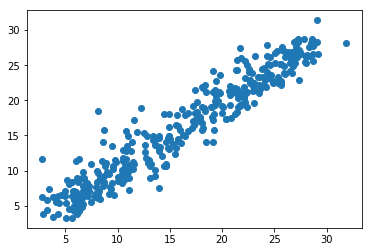

In [35]:
plt.scatter(pred[0], pred['y_rfc'])

# (3)

In [45]:
for i in range(1, 13) :
    interval = i
    train_x, train_y = make_data(df[train_year])
    test_x, test_y = make_data(df[test_year])
    rfc = LinearRegression()
    rfc.fit(train_x, train_y)
    score = rfc.score(test_x, test_y)
    coef = rfc.coef_
    print(f'interval={i}, Score= {score :.6f}, {coef}')
#     print(score.max())
    

interval=1, Score= 0.916555, [0.9667742]
interval=2, Score= 0.916581, [0.06286328 0.90597858]
interval=3, Score= 0.919901, [ 0.22511715 -0.14119798  0.89183702]
interval=4, Score= 0.921527, [ 0.11401055  0.12340854 -0.12510785  0.86617053]
interval=5, Score= 0.922325, [ 0.12199785  0.00826696  0.13868428 -0.14019032  0.8522554 ]
interval=6, Score= 0.923476, [ 0.11170987  0.02668439  0.02397893  0.12310026 -0.14104183  0.83853625]
interval=7, Score= 0.924459, [ 0.07983458  0.04476044  0.03792477  0.01413321  0.12117179 -0.14317956
  0.82962209]
interval=8, Score= 0.925395, [ 0.06612609  0.02499532  0.0541802   0.02992153  0.01316744  0.11861554
 -0.14604442  0.82433295]
interval=9, Score= 0.924817, [ 0.06193752  0.01503936  0.03402964  0.04680309  0.02910416  0.01136048
  0.11518242 -0.14762344  0.82028543]
interval=10, Score= 0.924763, [ 0.05184982  0.01938119  0.02267273  0.0281031   0.04617382  0.02758315
  0.00897769  0.11342586 -0.14843499  0.81708464]
interval=11, Score= 0.924513,

In [50]:
interval = 180
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])
rfc = LinearRegression()
rfc.fit(train_x, train_y)
score = rfc.score(test_x, test_y)
score

0.9293502347010671